<a href="https://colab.research.google.com/github/Aryan9012004/PRODIGY_DS_04/blob/main/PRODIGY_DS_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Connecting Google Drive to access all dataset**

In [53]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Importing necessary libraries**

In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

**Reading CSV file**

In [55]:
temp = pd.read_csv('/content/drive/MyDrive/Dataset_prodigy/twitter_trainingdata.csv')

**Checking top 5 and bottom 5 rows of the dataset**

In [56]:
temp.head(5)

,Column1,Column2,Column3,Column4
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [57]:
temp.tail(5)

,Column1,Column2,Column3,Column4
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...
74681,9200,Nvidia,Positive,Just like the windows partition of my Mac is l...


**Checking columns of the dataset**

In [58]:
temp.columns

Index(['Column1', 'Column2', 'Column3', 'Column4'], dtype='object')

**Adding column names**

In [59]:
col_names=['ID','Entity','Sentiments','Contest']
data = pd.read_csv('/content/drive/MyDrive/Dataset_prodigy/twitter_trainingdata.csv', names=col_names)

In [60]:
data.head()
data = data.drop(0)
data.head()

,ID,Entity,Sentiments,Contest
1,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
2,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
3,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
4,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
5,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


**Additional Information about the dataset**

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 1 to 74682
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          74682 non-null  object
 1   Entity      74682 non-null  object
 2   Sentiments  74682 non-null  object
 3   Contest     73996 non-null  object
dtypes: object(4)
memory usage: 2.3+ MB


In [62]:
data.describe()

,ID,Entity,Sentiments,Contest
count,74682,74682,74682,73996
unique,12447,32,4,69489
top,2401,TomClancysRainbowSix,Negative,
freq,6,2400,22542,172


**Checking for missing values**

In [63]:
data.isna().sum()

,0
ID,0
Entity,0
Sentiments,0
Contest,686


**Handling missing values**

In [64]:
data.dropna(axis=0,inplace=True)

In [65]:
data.isna().sum()

,0
ID,0
Entity,0
Sentiments,0
Contest,0


**Checking for duplicate data**

In [66]:
data.duplicated().sum()

2341

**Removing Duplicate Data**

In [67]:
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

**Sentiment Distribution**

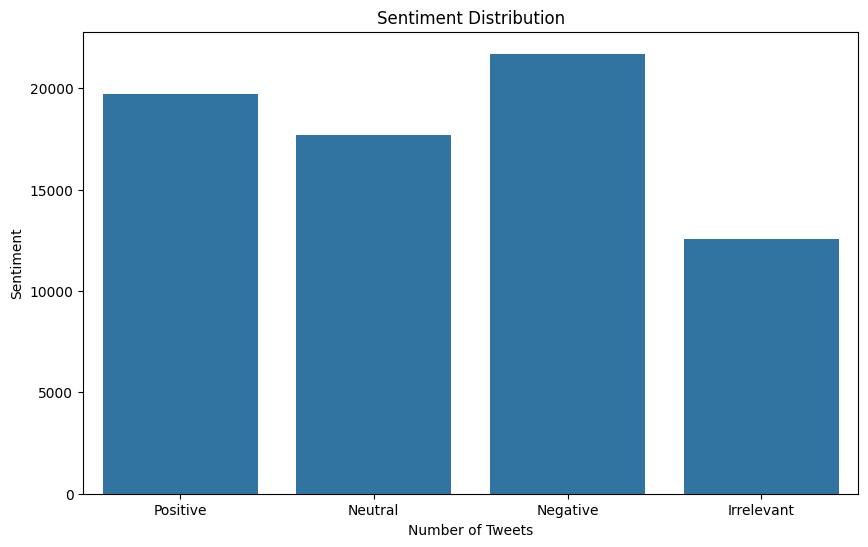

In [68]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Sentiments', data=data)
plt.title('Sentiment Distribution')
plt.xlabel('Number of Tweets')
plt.ylabel('Sentiment')
plt.show()

**Brand Analyis for amazon**

In [70]:
brand_data=data[data['Entity'].str.contains('amazon',case=False)]
sentiment_count=brand_data['Sentiments'].value_counts()
sentiment_count

,count
Sentiments,
Neutral,1197
Negative,565
Positive,302
Irrelevant,185


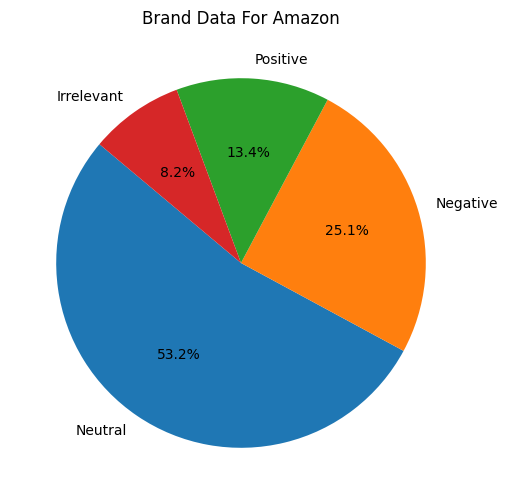

In [73]:
plt.figure(figsize=(6,6))
plt.pie(sentiment_count,labels=sentiment_count.index,autopct='%1.1f%%',startangle=140)
plt.title('Brand Data For Amazon')
plt.show()